In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [16]:
df=pd.read_csv('Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [17]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [18]:
df[df.duplicated()]

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min


In [19]:
df.dtypes

Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object

In [20]:
print(df.shape)

(1000, 9)


In [21]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (108) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (108) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (108) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (108) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list 

<Figure size 640x480 with 0 Axes>

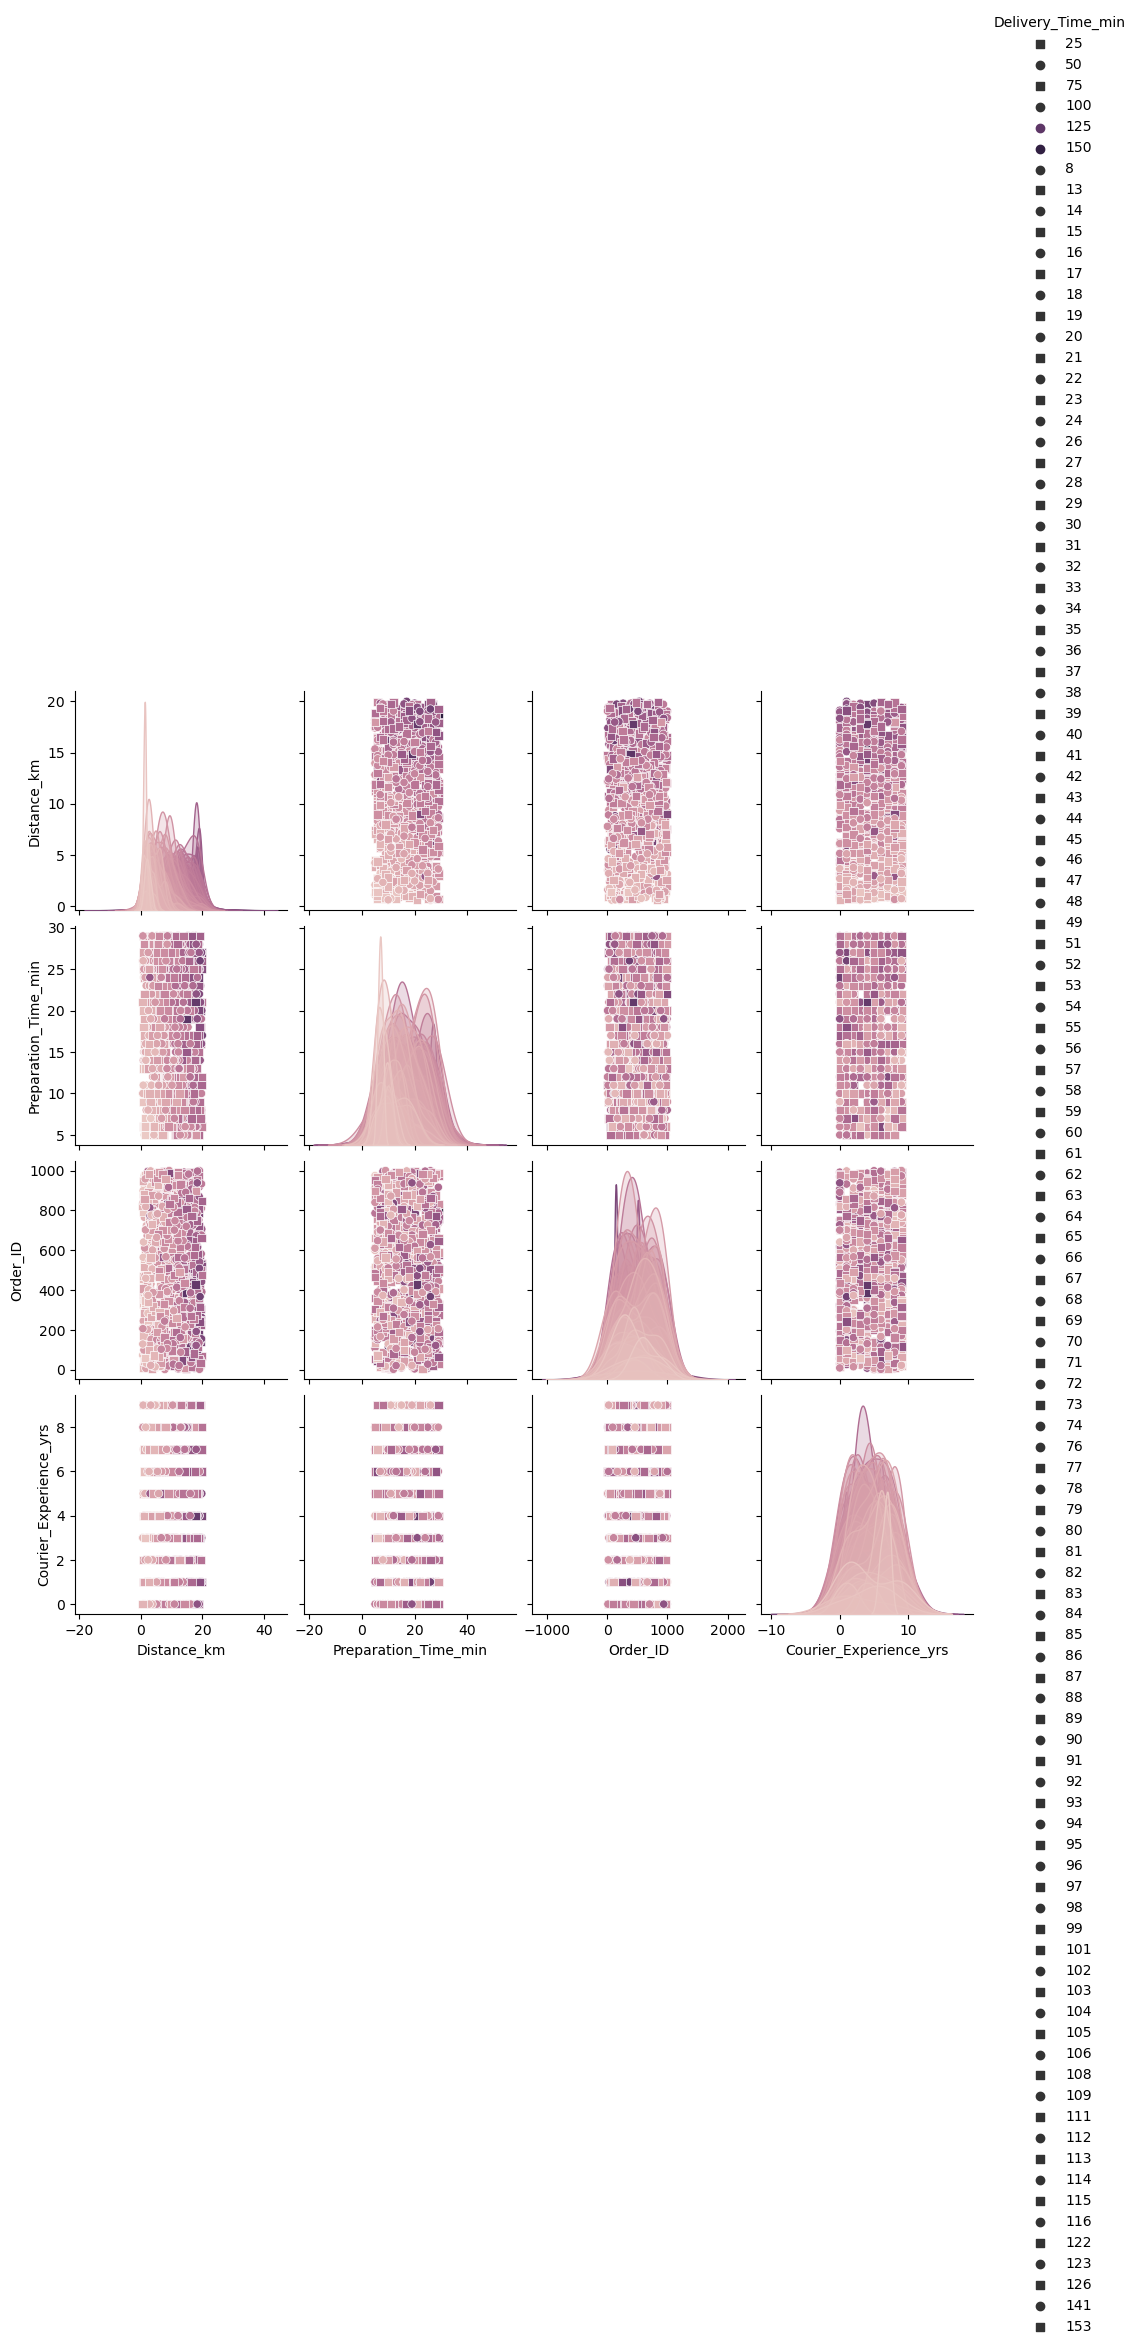

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.pairplot(df, vars=['Distance_km', 'Preparation_Time_min', 'Order_ID', 'Courier_Experience_yrs'], hue = "Delivery_Time_min", markers=["o", "s"])
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_5900\523092850.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


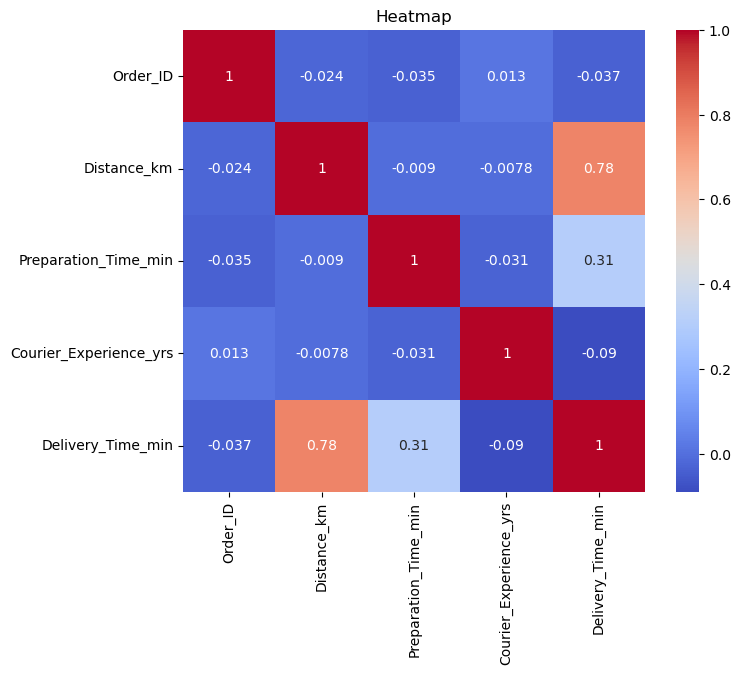

In [25]:
corr_matrix=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',square=True)
plt.title('Heatmap')
plt.show()

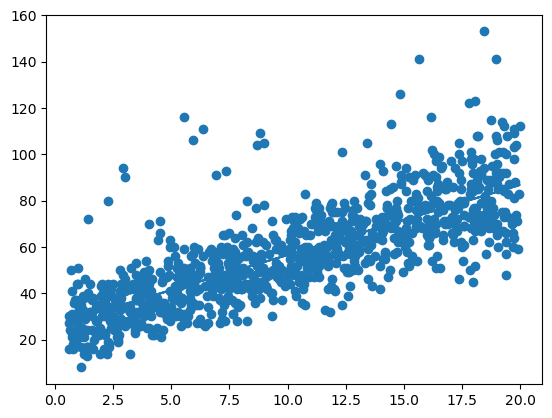

0.780998358615775


In [33]:
from scipy import stats
X=df['Distance_km']
y=df['Delivery_Time_min']
slope,intercept,r,p,std_err=stats.linregress(X,y)
def myfunc(X):
    return slope * X + intercept
mymodel=list(map(myfunc,X))
plt.scatter(X,y)
plt.plot(X,mymodel)
plt.show()
print(r)


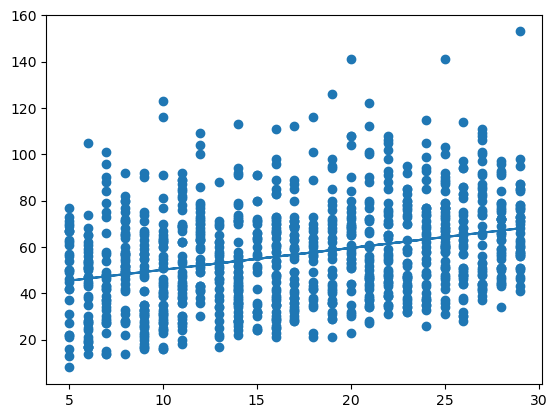

0.30734996261566955


In [35]:
from scipy import stats
X=df['Preparation_Time_min']
y=df['Delivery_Time_min']
slope,intercept,r,p,std_err=stats.linregress(X,y)
def myfunc(X):
    return slope * X + intercept
mymodel=list(map(myfunc,X))
plt.scatter(X,y)
plt.plot(X,mymodel)
plt.show()
print(r)

In [36]:
X=df[['Distance_km','Preparation_Time_min']]
t=df['Delivery_Time_min']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error
r_square=r2_score(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
me=mean_absolute_error(y_test,y_pred)
print(me)
print(r_square)
print(rmse)

7.680351163763087
0.731302340005336
10.974403825674848


In [39]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
r_squared_cv = cross_val_score(model, X, y, cv=5, scoring='r2')
rmse_cv = -cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')

print(r_squared_cv)
print(rmse_cv)

[0.61319084 0.74771185 0.7406755  0.69923663 0.74188252]
[14.03586044 11.34897139 11.28020193 11.8593239  10.78049381]


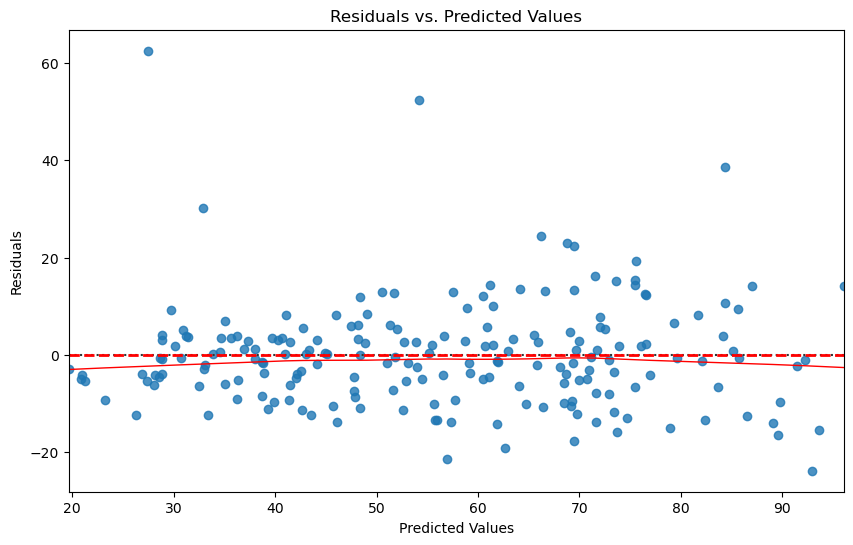

In [40]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(0, color='red', linestyle='dashed', linewidth=2)
plt.show()